In [1]:
# Let's start by installing the libraries for data wrangling, data visualization and model building

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


In [2]:
# Importing the modules needed later in the notebook

# Numpy matrix and array operations
import numpy as np

#  Pandas dataframes and operations
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# Statistical graphics
import seaborn as sns

# Magic function that allows you to display plots embedded in a Jupyter notebook
%matplotlib inline


# # Accessing the data set: Option 1


In [3]:
#
# READ AND FOLLOW THE INSTRUCTIONS!!
# 
# Insert code to load data as a Pandas Dataframe
#
# Open the "Code snippets" and select "Read data" and then "Select data from project". 
# Next, click Data asset and select marketing.csv
# Finally, click "Insert code to cell"



### It should look like this:

In [4]:
import itc_utils.flight_service as itcfs

readClient = itcfs.get_flight_client()

nb_data_request = {
    'data_name': """marketing.csv""",
    'interaction_properties': {
        #'row_limit': 500,
        'infer_schema': 'true',
        'infer_as_varchar': 'false'
    }
}

flightInfo = itcfs.get_flight_info(readClient, nb_data_request=nb_data_request)

data_df_1 = itcfs.read_pandas_and_concat(readClient, flightInfo, timeout=240)
data_df_1.head(10)





 
    



,id,recency,total_purchase,frequency,last_purchase_amount,region,gender,age,repeater
0,497975716,33,13.26,3,5.98,Mid-Atlantic,Female,48,Yes
1,560327838,49,9.48,3,3.00,Mid-Atlantic,Female,42,Yes
2,126707506,45,3.99,1,3.99,South-West,Female,36,No
3,495782481,56,6.76,2,3.99,Mid-Atlantic,Female,42,Yes
4,3994228590,78,9.27,3,3.29,South-East,Male,32,No
5,125093627,334,3.06,1,3.06,South-East,Female,31,No
6,3379484954,141,3.59,1,3.59,West,Female,57,Yes
7,2571365333,195,18.54,4,5.98,West,Male,44,Yes
8,3296426695,173,11.07,3,4.19,West,Female,32,Yes
9,308643361,297,14.36,3,3.59,South-West,Male,54,No


# Accessing the data set: Option 2


In [5]:
#
# Your data is stored in /project_data/data_asset/
# Check that the data is loaded into the project



In [6]:

!ls /project_data/data_asset/


marketing.csv


In [7]:
# Load your data using the pandas function load_csv

data_df_2 = pd.read_csv("/project_data/data_asset/marketing.csv")

In [8]:
data_df_2.head()

,id,recency,total_purchase,frequency,last_purchase_amount,region,gender,age,repeater
0,497975716,33,13.26,3,5.98,Mid-Atlantic,Female,48,Yes
1,560327838,49,9.48,3,3.00,Mid-Atlantic,Female,42,Yes
2,126707506,45,3.99,1,3.99,South-West,Female,36,No
3,495782481,56,6.76,2,3.99,Mid-Atlantic,Female,42,Yes
4,3994228590,78,9.27,3,3.29,South-East,Male,32,No


In [9]:
# Make a copy of the dataset and show the first 10 rows of the dataframe

df = data_df_1.copy()
df.head(10)


,id,recency,total_purchase,frequency,last_purchase_amount,region,gender,age,repeater
0,497975716,33,13.26,3,5.98,Mid-Atlantic,Female,48,Yes
1,560327838,49,9.48,3,3.00,Mid-Atlantic,Female,42,Yes
2,126707506,45,3.99,1,3.99,South-West,Female,36,No
3,495782481,56,6.76,2,3.99,Mid-Atlantic,Female,42,Yes
4,3994228590,78,9.27,3,3.29,South-East,Male,32,No
5,125093627,334,3.06,1,3.06,South-East,Female,31,No
6,3379484954,141,3.59,1,3.59,West,Female,57,Yes
7,2571365333,195,18.54,4,5.98,West,Male,44,Yes
8,3296426695,173,11.07,3,4.19,West,Female,32,Yes
9,308643361,297,14.36,3,3.59,South-West,Male,54,No


In [10]:
# The info function prints a concise summary of the dataframe to get a quick overview of the marketing.csv data set

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7384 non-null   int64  
 1   recency               7384 non-null   int32  
 2   total_purchase        7384 non-null   float64
 3   frequency             7384 non-null   int32  
 4   last_purchase_amount  7384 non-null   float64
 5   region                7384 non-null   object 
 6   gender                7384 non-null   object 
 7   age                   7384 non-null   int32  
 8   repeater              7384 non-null   object 
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 432.8+ KB


In [11]:
# These instructions are optional for when your data types are not inferred correctly from the .csv file
# when you did not add the infer_schema': """true""" option to the interaction properties

df[['total_purchase', 'last_purchase_amount']] = df[['total_purchase', 'last_purchase_amount']].astype(float)
df


,id,recency,total_purchase,frequency,last_purchase_amount,region,gender,age,repeater
0,497975716,33,13.26,3,5.98,Mid-Atlantic,Female,48,Yes
1,560327838,49,9.48,3,3.00,Mid-Atlantic,Female,42,Yes
2,126707506,45,3.99,1,3.99,South-West,Female,36,No
3,495782481,56,6.76,2,3.99,Mid-Atlantic,Female,42,Yes
4,3994228590,78,9.27,3,3.29,South-East,Male,32,No
...,...,...,...,...,...,...,...,...,...
7379,583657117,156,5.98,1,5.98,Mid-Atlantic,Male,52,Yes
7380,4631171995,78,3.99,1,3.99,Mid-West,Female,67,Yes
7381,560051081,60,6.00,1,6.00,Mid-Atlantic,Female,47,Yes
7382,2422958552,237,3.29,1,3.29,Mid-Atlantic,Male,43,Yes


In [12]:
# Print a concise summary of the dataframe to check the data types of the 8 columns in the amsel.csv data set

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7384 non-null   int64  
 1   recency               7384 non-null   int32  
 2   total_purchase        7384 non-null   float64
 3   frequency             7384 non-null   int32  
 4   last_purchase_amount  7384 non-null   float64
 5   region                7384 non-null   object 
 6   gender                7384 non-null   object 
 7   age                   7384 non-null   int32  
 8   repeater              7384 non-null   object 
dtypes: float64(2), int32(3), int64(1), object(3)
memory usage: 432.8+ KB


In [13]:
# These instructions are optional for when your data types are not inferred correctly from the .csv file
# when you did not add the infer_schema': """true""" option to the interaction properties

df[['id', 'recency', 'frequency', 'age']] = df[['id', 'recency', 'frequency', 'age']].astype(int)
df


,id,recency,total_purchase,frequency,last_purchase_amount,region,gender,age,repeater
0,497975716,33,13.26,3,5.98,Mid-Atlantic,Female,48,Yes
1,560327838,49,9.48,3,3.00,Mid-Atlantic,Female,42,Yes
2,126707506,45,3.99,1,3.99,South-West,Female,36,No
3,495782481,56,6.76,2,3.99,Mid-Atlantic,Female,42,Yes
4,3994228590,78,9.27,3,3.29,South-East,Male,32,No
...,...,...,...,...,...,...,...,...,...
7379,583657117,156,5.98,1,5.98,Mid-Atlantic,Male,52,Yes
7380,4631171995,78,3.99,1,3.99,Mid-West,Female,67,Yes
7381,560051081,60,6.00,1,6.00,Mid-Atlantic,Female,47,Yes
7382,2422958552,237,3.29,1,3.29,Mid-Atlantic,Male,43,Yes


In [14]:
# Check data types again as this is crucial to to correct execution of the rest of the notebook!

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7384 non-null   int64  
 1   recency               7384 non-null   int64  
 2   total_purchase        7384 non-null   float64
 3   frequency             7384 non-null   int64  
 4   last_purchase_amount  7384 non-null   float64
 5   region                7384 non-null   object 
 6   gender                7384 non-null   object 
 7   age                   7384 non-null   int64  
 8   repeater              7384 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 519.3+ KB


# Exploratory Data Analysis


In [15]:
# Check whether all id's are unique (7384 different values)

df[['id']].nunique()


id    7384
dtype: int64

In [16]:
# Drop the id column as all values are unique and the column should not be used for modeling

df = df.drop('id', axis=1)


In [17]:
# Show the default descriptive statistic for numerical columns (dtype int64 and float64)

df.describe()


,recency,total_purchase,frequency,last_purchase_amount,age
count,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,134.357936,8.348307,2.131094,4.108470,40.989843
std,83.254347,14.648450,3.388500,1.465847,11.146435
min,15.000000,3.030000,1.000000,0.490000,17.000000
25%,59.000000,3.790000,1.000000,3.290000,32.000000
50%,124.000000,5.980000,1.000000,3.790000,40.000000
75%,191.000000,9.270000,2.000000,4.190000,47.000000
max,365.000000,830.090000,177.000000,27.000000,93.000000


In [18]:
# Compute the number of values belonging to each class of the repeater column

df.value_counts(subset='repeater', normalize=False)


repeater
Yes    3862
No     3522
dtype: int64

In [19]:
# Compute the number of values belonging to each class of the region column

df.value_counts(subset='region', normalize=False)


region
Mid-Atlantic    2885
West            1419
South-East      1066
Mid-West         883
South-West       581
North-West       333
North-East       217
dtype: int64

# Visualization

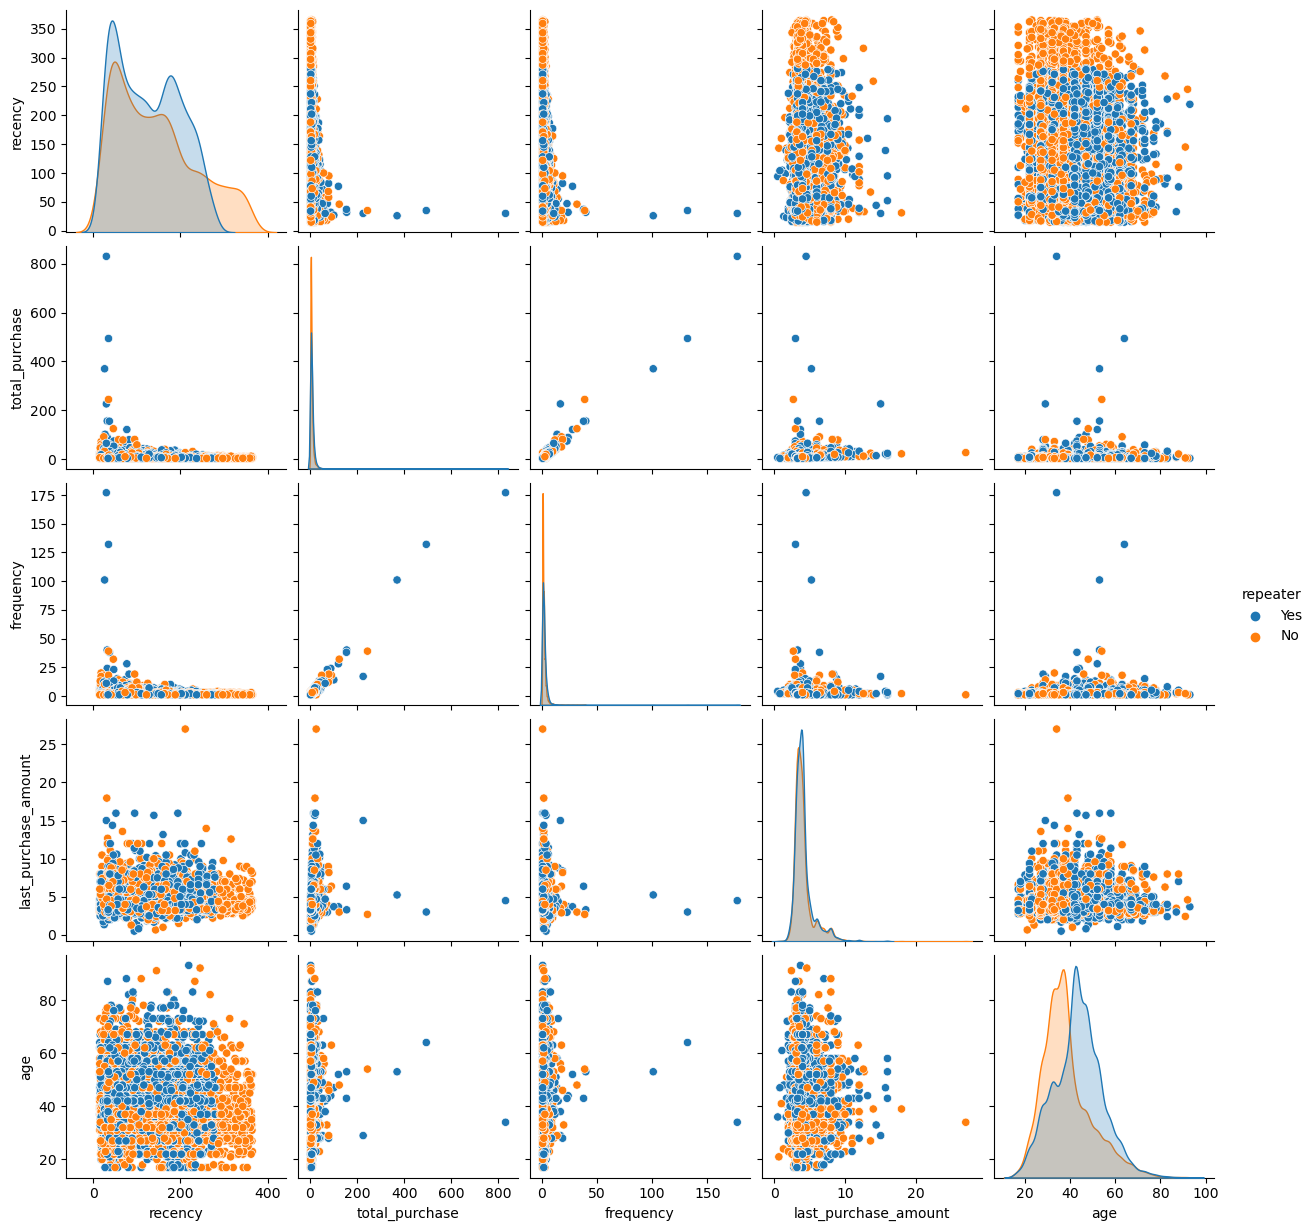

In [20]:
# Show the relations between multiple features coloured by target variable (column) repeater 

sns.pairplot(data=df, kind='scatter', hue='repeater')
plt.show()


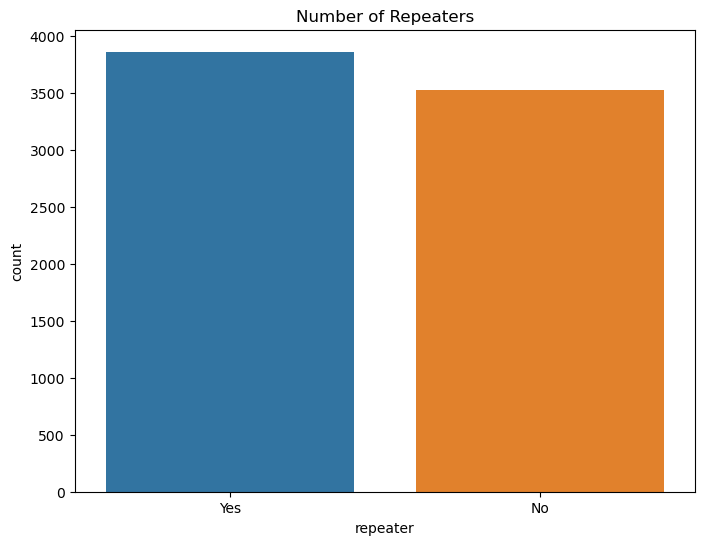

In [21]:
# Plot the number of observations per class for repeater column

plt.figure(figsize=(8,6))
sns.countplot(x='repeater', data=df)
plt.title('Number of Repeaters')
plt.show()


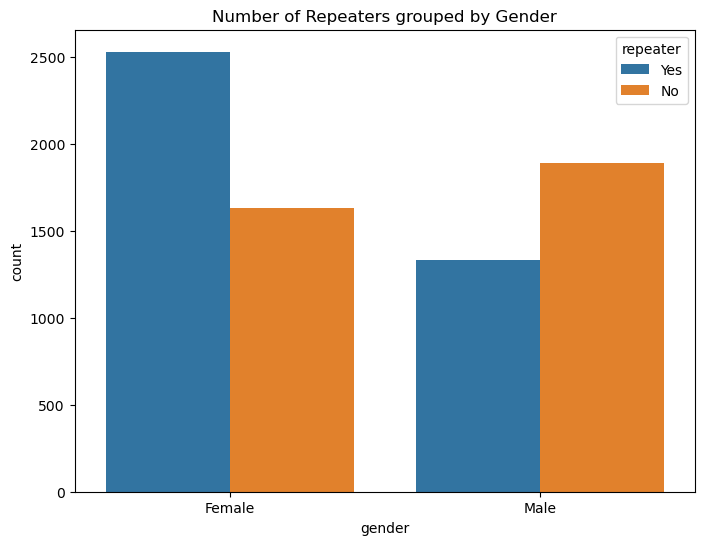

In [22]:
# Plot the number of observations per class for repeater column grouped by gender

plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='repeater', data=df)
plt.title('Number of Repeaters grouped by Gender')
plt.show()


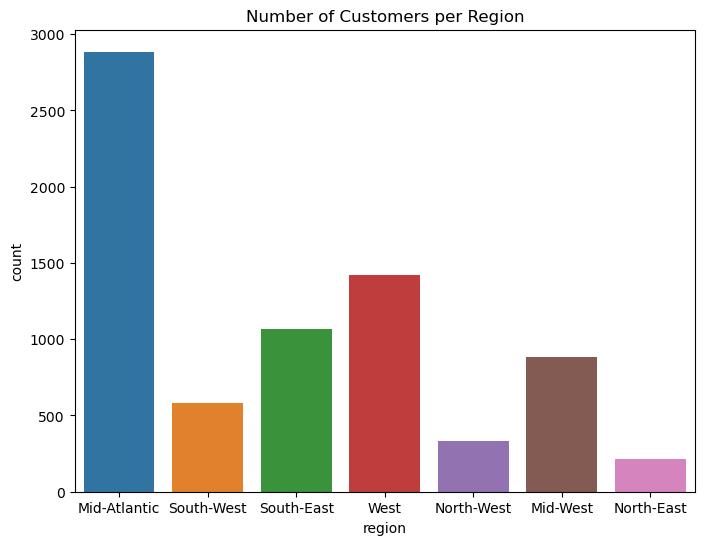

In [23]:
# Plot the number of observations per category for the region column

plt.figure(figsize=(8,6))
sns.countplot(x='region', data=df)
plt.title('Number of Customers per Region')
plt.show()


# Dummy Coding

In [24]:
# Create N dummy variables, one for reach class of region and gender

df_dummies = pd.get_dummies(df[['region','gender']])
df_dummies


,region_Mid-Atlantic,region_Mid-West,region_North-East,region_North-West,region_South-East,region_South-West,region_West,gender_Female,gender_Male
0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7379,1,0,0,0,0,0,0,0,1
7380,0,1,0,0,0,0,0,1,0
7381,1,0,0,0,0,0,0,1,0
7382,1,0,0,0,0,0,0,0,1


In [25]:
# Concatenate newly created dummy variables to original data set

df_to_concat = [df, df_dummies]

df_final = pd.concat(df_to_concat, axis=1)
df_final.head()


,recency,total_purchase,frequency,last_purchase_amount,region,gender,age,repeater,region_Mid-Atlantic,region_Mid-West,region_North-East,region_North-West,region_South-East,region_South-West,region_West,gender_Female,gender_Male
0,33,13.26,3,5.98,Mid-Atlantic,Female,48,Yes,1,0,0,0,0,0,0,1,0
1,49,9.48,3,3.00,Mid-Atlantic,Female,42,Yes,1,0,0,0,0,0,0,1,0
2,45,3.99,1,3.99,South-West,Female,36,No,0,0,0,0,0,1,0,1,0
3,56,6.76,2,3.99,Mid-Atlantic,Female,42,Yes,1,0,0,0,0,0,0,1,0
4,78,9.27,3,3.29,South-East,Male,32,No,0,0,0,0,1,0,0,0,1


In [26]:
# Drop original columns region and gender
# As gender is binary, we only need one new column to represent the original column, therefore dropping gender_male

df_final = df_final.drop(columns=['region','gender', 'gender_Male'], axis=1)
df_final


,recency,total_purchase,frequency,last_purchase_amount,age,repeater,region_Mid-Atlantic,region_Mid-West,region_North-East,region_North-West,region_South-East,region_South-West,region_West,gender_Female
0,33,13.26,3,5.98,48,Yes,1,0,0,0,0,0,0,1
1,49,9.48,3,3.00,42,Yes,1,0,0,0,0,0,0,1
2,45,3.99,1,3.99,36,No,0,0,0,0,0,1,0,1
3,56,6.76,2,3.99,42,Yes,1,0,0,0,0,0,0,1
4,78,9.27,3,3.29,32,No,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,156,5.98,1,5.98,52,Yes,1,0,0,0,0,0,0,0
7380,78,3.99,1,3.99,67,Yes,0,1,0,0,0,0,0,1
7381,60,6.00,1,6.00,47,Yes,1,0,0,0,0,0,0,1
7382,237,3.29,1,3.29,43,Yes,1,0,0,0,0,0,0,0


# Splitting the data into training and testing data sets

In [27]:
# Defining X and y

X = df_final.drop(columns='repeater', axis=1)
y = df_final.repeater


In [28]:
# Import the train_test_split module from sklearn.model_selection

from sklearn.model_selection import train_test_split


In [29]:
# Split the data set into training and testing data sets with 70% of the data allocated to the training data and 30% to the testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


## Import Logistic Regression Classifier and build a Logistic Regression Model

In [30]:
# First, heck if we have a balanced training data set

y_train.value_counts(normalize=True)


Yes    0.522059
No     0.477941
Name: repeater, dtype: float64

In [31]:
# Also, check if we have a balanced testing data set

y_test.value_counts(normalize=True)


Yes    0.525271
No     0.474729
Name: repeater, dtype: float64

In [32]:
# Import LogisticRegression classifier from sklearn.linear_model

from sklearn.linear_model import LogisticRegression

# Standard logistic Regression 
# Create an instance of the class

lr = LogisticRegression(solver='liblinear', class_weight='balanced')


In [33]:
# Fit the linear regression model on data from the training data set

lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [34]:
# predict the outcomes on the testing data set

test_pred = lr.predict(X_test)
test_pred


array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

# Results

In [35]:
#import the classification_report, confusion_matrix, accuracy_score and area under the Receiver Operating Characteristic Curve from sklearn.metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


In [36]:
# Obtain the results from the classification report and confusion matrix 

print('Classifcation report:\n', classification_report(y_test, test_pred))
confusion_matrix = confusion_matrix(y_test, test_pred)
print('Confusion matrix:\n', confusion_matrix)


Classifcation report:
               precision    recall  f1-score   support

          No       0.69      0.69      0.69      1052
         Yes       0.72      0.72      0.72      1164

    accuracy                           0.71      2216
   macro avg       0.71      0.71      0.71      2216
weighted avg       0.71      0.71      0.71      2216

Confusion matrix:
 [[728 324]
 [325 839]]


In [37]:
# Identify the number of True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN) 

TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

print("(Total) True Positive       :", TP)
print("(Total) True Negative       :", TN)
print("(Total) False Positive      :", FP)
print("(Total) False Negative      :", FN)


(Total) True Positive       : 839
(Total) True Negative       : 728
(Total) False Positive      : 324
(Total) False Negative      : 325


In [38]:
# Double-check Accuracy

accuracy = accuracy_score(y_test, test_pred)

round(accuracy,4)


0.7071

In [39]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) 

roc_auc_score = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

round(roc_auc_score,4)

0.7672